In [399]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import warnings
%matplotlib inline


# HW 2:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration. How many iterations are required to reduce the relative error to machine precision (if it converges)?

**Remember**: if you want to write $g^\prime$, remember to use `g^\prime` rather than `g'` in $\LaTeX$

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [403]:
def fixed_point(g, x0, N=5):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial iterate
        - *N* (int) - number of terms in iteration
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
    """
# YOUR CODE HERE
    x = x0
    ite = [x0]
    for i in range(N):
        x = g(x)
        ite.append(x)
    return ite

In [404]:
### Free cell for messing with your code

In [405]:
# Testing Cell

N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979, 0.79348036, 0.70136877])

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
print('success: passed N=5 test')

x_true = 0.7390851332153119
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success: passed N=1000 test')

success: passed N=5 test
success: passed N=1000 test


**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

### 1. Confirm that \( x = \sqrt{M} \) is a fixed point

We are given the function:

$$
g(x) = 1 + x - \frac{x^2}{M}
$$

To verify that \( x = \sqrt{M} \) is a fixed point, we substitute \( x = \sqrt{M} \) into \( g(x) \) and check whether \( g(\sqrt{M}) = \sqrt{M} \).

$$
g(\sqrt{M}) = 1 + \sqrt{M} - \frac{(\sqrt{M})^2}{M} = 1 + \sqrt{M} - \frac{M}{M}
$$
$$
g(\sqrt{M}) = 1 + \sqrt{M} - 1 = \sqrt{M}
$$

Thus, \( x = \sqrt{M} \) is indeed a fixed point of \( g(x) \).

---

### 2. Convergence behavior and stability analysis

To determine the convergence behavior, we analyze the derivative of \( g(x) \) near the fixed point. The fixed point is stable if \( |g'(x)| < 1 \) at \( x = \sqrt{M} \).

First, compute the derivative of \( g(x) \):

$$
g'(x) = \frac{d}{dx} \left(1 + x - \frac{x^2}{M}\right) = 1 - \frac{2x}{M}
$$

Now, evaluate the derivative at \( x = \sqrt{M} \):

$$
g'(\sqrt{M}) = 1 - \frac{2\sqrt{M}}{M} = 1 - \frac{2}{\sqrt{M}}
$$

The stability condition is \( |g'(\sqrt{M})| < 1 \). For this to hold, we need:

$$
-1 < 1 - \frac{2}{\sqrt{M}} < 1
$$

#### Upper bound:

$$
1 - \frac{2}{\sqrt{M}} < 1 \quad \Rightarrow \quad 0 < \frac{2}{\sqrt{M}} \quad \Rightarrow \quad M > 0
$$

This condition is always satisfied for \( M > 0 \).

#### Lower bound:

$$
-1 < 1 - \frac{2}{\sqrt{M}} \quad \Rightarrow \quad \frac{2}{\sqrt{M}} < 2 \quad \Rightarrow \quad M > 1
$$

Thus, the fixed point is stable if \( M > 1 \). If \( M \leq 1 \), the iterative scheme will not be stable, and convergence will not occur.

---

### 3. Set \( M = 3 \) and \( x_0 = 2 \): Convergence Plot

Now we consider the function \( g(x) = 1 + x - \frac{x^2}{M} \) with \( M = 3 \), and we start the iteration with \( x_0 = 2 \). Below is the plot showing the logarithm of the relative error as a function of the iteration number:

$$
\text{Relative error} = \frac{|x_n - \sqrt{M}|}{|\sqrt{M}|}
$$

The plot shows that the method converged in 22 iterations, as displayed below.
hows that the method converged in 22 iterations, as displayed below.
ot shows that the method converged in 22 iterations, as displayed below.
hows that the method converged in 22 iterations, as displayed below.
)g(x)g(x).

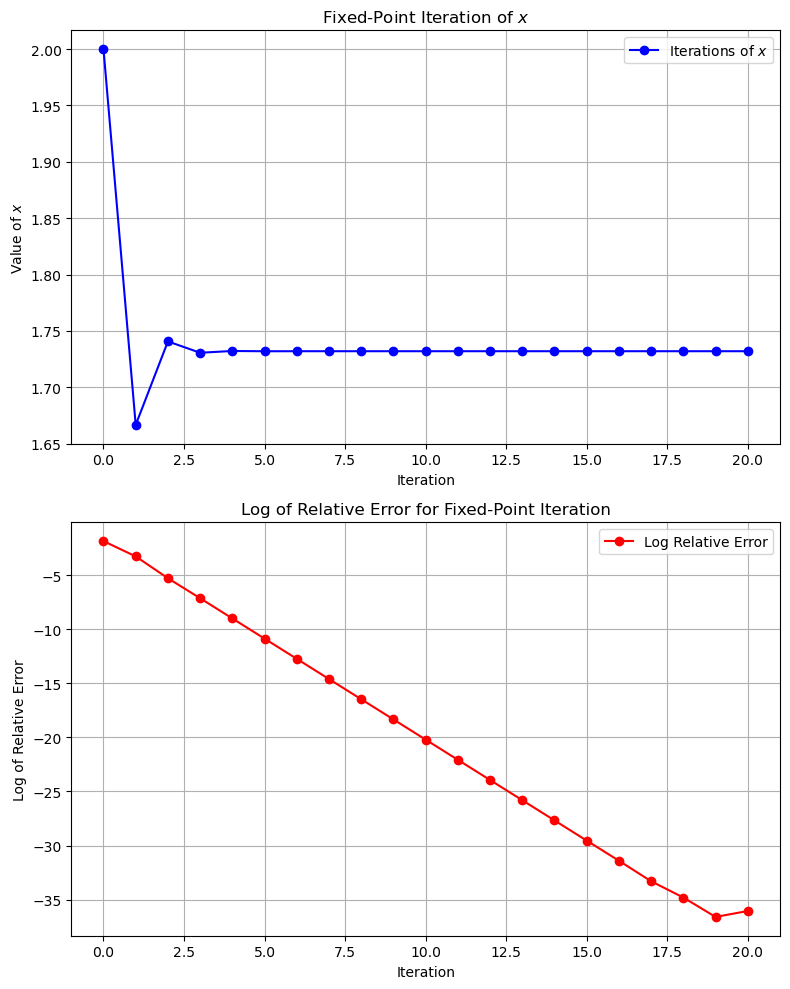

In [408]:
M = 3
x0 = 2
true_sqrt = numpy.sqrt(M)

def g(x, M):
    return 1 + x - x**2 / M

N_iter = 20
iterations = fixed_point(lambda x: g(x, M), x0, N_iter)

errors = [abs(x - true_sqrt) / true_sqrt for x in iterations]

errors = numpy.array(errors)
errors[errors == 0] = numpy.finfo(float).eps

log_errors = numpy.log(errors)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.plot(range(N_iter + 1), iterations, marker='o', color='b', label="Iterations of $x$")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Value of $x$")
ax1.set_title("Fixed-Point Iteration of $x$")
ax1.grid(True)
ax1.legend()

ax2.plot(range(N_iter + 1), log_errors, marker='o', color='r', label="Log Relative Error")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Log of Relative Error")
ax2.set_title("Log of Relative Error for Fixed-Point Iteration")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

Converge at 22 iteration.

 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$

### 1. Confirm that \( x = \sqrt{M} \) is a fixed point

We are given the function:

$$
g(x) = \frac{M}{x}
$$

To verify that \( x = \sqrt{M} \) is a fixed point, we substitute \( x = \sqrt{M} \) into \( g(x) \) and check whether \( g(\sqrt{M}) = \sqrt{M} \).

$$
g(\sqrt{M}) = \frac{M}{\sqrt{M}} = \sqrt{M}
$$

Thus, \( x = \sqrt{M} \) is indeed a fixed point of \( g(x) \).

---

### 2. Convergence behavior and stability analysis

To determine the convergence behavior, we analyze the derivative of \( g(x) \) near the fixed point. The fixed point is stable if \( |g'(x)| < 1 \) at \( x = \sqrt{M} \).

First, compute the derivative of \( g(x) \):

$$
g'(x) = \frac{d}{dx} \left(\frac{M}{x}\right) = -\frac{M}{x^2}
$$

Now, evaluate the derivative at \( x = \sqrt{M} \):

$$
g'(\sqrt{M}) = -\frac{M}{(\sqrt{M})^2} = -\frac{M}{M} = -1
$$

The stability condition is \( |g'(\sqrt{M})| < 1 \). Here we find:

$$
|g'(\sqrt{M})| = 1
$$

Since \( |g'(\sqrt{M})| = 1 \), the fixed point \( x = \sqrt{M} \) is marginally stable. In practical terms, the iterative scheme might not converge very efficiently, and small numerical errors could cause divergence or oscillation.

---

### 3. Set \( M = 3 \) and \( x_0 = 2 \): Convergence Plot

Now, we consider the function \( g(x) = \frac{M}{x} \) with \( M = 3 \), and we start the iteration with \( x_0 = 2 \). Below is the plot showing the logarithm of the relative error as a function of the iteration number:

$$
\text{Relative error} = \frac{|x_n - \sqrt{M}|}{|\sqrt{M}|}
$$

The plot shows how the iterative method performs for this choice of \( g(x) \).


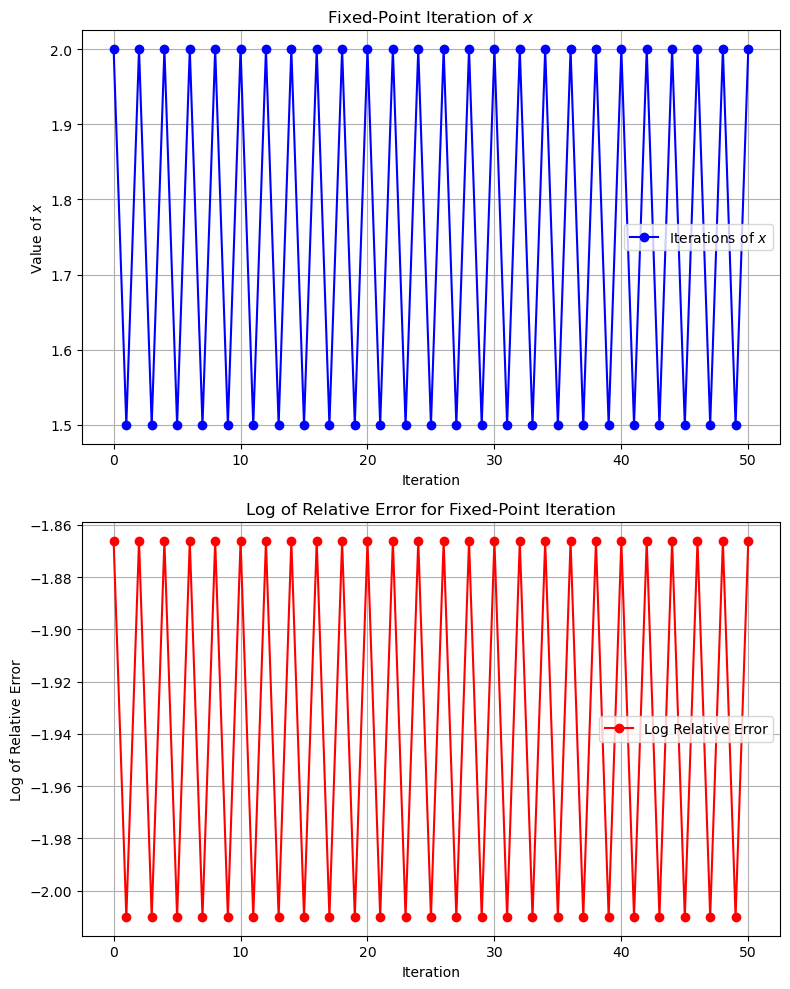

In [412]:
M = 3
x0 = 2
true_sqrt = numpy.sqrt(M)

def g(x, M):
    return (M/x)

N_iter = 50
iterations = fixed_point(lambda x: g(x, M), x0, N_iter)

errors = [abs(x - true_sqrt) / true_sqrt for x in iterations]

errors = numpy.array(errors)
errors[errors == 0] = numpy.finfo(float).eps

log_errors = numpy.log(errors)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.plot(range(N_iter + 1), iterations, marker='o', color='b', label="Iterations of $x$")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Value of $x$")
ax1.set_title("Fixed-Point Iteration of $x$")
ax1.grid(True)
ax1.legend()

ax2.plot(range(N_iter + 1), log_errors, marker='o', color='r', label="Log Relative Error")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Log of Relative Error")
ax2.set_title("Log of Relative Error for Fixed-Point Iteration")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

Plot shows it never converges.


**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f^\prime}$$

with $$ f = x^2 - M$$

### 1. Newton's method setup

Newton's method is given by the function:

$$
g(x) = x - \frac{f(x)}{f'(x)}
$$

where \( f(x) = x^2 - M \).

First, we compute the derivative of \( f(x) \):

$$
f'(x) = 2x
$$

Substitute \( f(x) \) and \( f'(x) \) into Newton's method:

$$
g(x) = x - \frac{x^2 - M}{2x}
$$

Simplify the expression:

$$
g(x) = x - \frac{x^2}{2x} + \frac{M}{2x} = \frac{x}{2} + \frac{M}{2x}
$$

Thus, the Newton's method update function is:

$$
g(x) = \frac{x}{2} + \frac{M}{2x}
$$

---

### 2. Confirm that \( x = \sqrt{M} \) is a fixed point

To verify that \( x = \sqrt{M} \) is a fixed point, we substitute \( x = \sqrt{M} \) into \( g(x) \) and check whether \( g(\sqrt{M}) = \sqrt{M} \).

$$
g(\sqrt{M}) = \frac{\sqrt{M}}{2} + \frac{M}{2\sqrt{M}} = \frac{\sqrt{M}}{2} + \frac{\sqrt{M}}{2} = \sqrt{M}
$$

Thus, \( x = \sqrt{M} \) is indeed a fixed point of Newton's method.

---

### 3. Convergence behavior and stability analysis

To analyze the convergence behavior, we compute the derivative of \( g(x) \) near the fixed point.

First, we have:

$$
g(x) = \frac{x}{2} + \frac{M}{2x}
$$

Now, differentiate \( g(x) \):

$$
g'(x) = \frac{1}{2} - \frac{M}{2x^2}
$$

Evaluate the derivative at \( x = \sqrt{M} \):

$$
g'(\sqrt{M}) = \frac{1}{2} - \frac{M}{2(\sqrt{M})^2} = \frac{1}{2} - \frac{M}{2M} = \frac{1}{2} - \frac{1}{2} = 0
$$

Since \( g'(\sqrt{M}) = 0 \), the convergence is **quadratic** near the fixed point, meaning that the method will converge very quickly near \( x = \sqrt{M} \).

---

### 4. Set \( M = 3 \) and \( x_0 = 2 \): Convergence Plot

Using the Newton's method update function \( g(x) = \frac{x}{2} + \frac{M}{2x} \) with \( M = 3 \), and starting with \( x_0 = 2 \), we can compute the iterations and plot the logarithm of the relative error as a function of the iteration number:

$$
\text{Relative error} = \frac{|x_n - \sqrt{M}|}{|\sqrt{M}|}
$$

The plot will show rapid convergence due to the quadratic nature of the method.


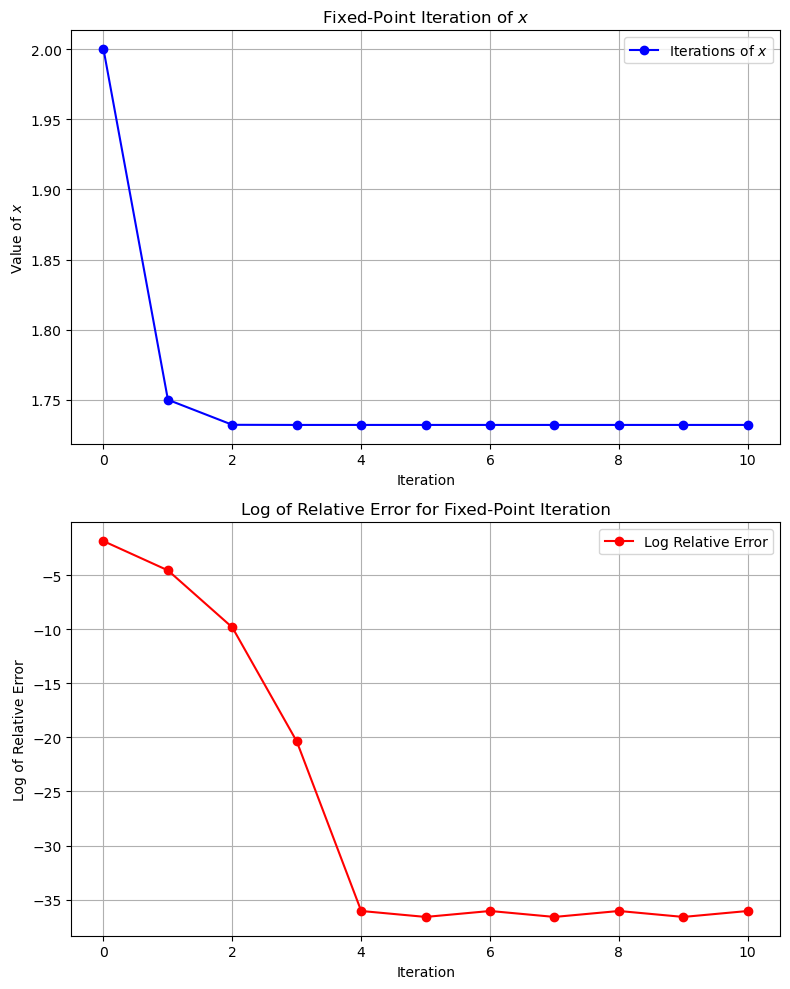

In [416]:
def newton_method(f, df, x0, N=5):
    x = x0
    iterates = [x0]
    for i in range(N):
        x = x - f(x) / df(x)  
        iterates.append(x)
    return iterates
    
M = 3
x0 = 2
true_sqrt = numpy.sqrt(M)

def f(x):
    return x**2 - M

def df(x):
    return 2*x

N_iter = 10
iterations = newton_method(f, df, x0, N_iter)
errors = [abs(x - true_sqrt) / true_sqrt for x in iterations]

errors = numpy.array(errors)
errors[errors == 0] = numpy.finfo(float).eps

log_errors = numpy.log(errors)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.plot(range(N_iter + 1), iterations, marker='o', color='b', label="Iterations of $x$")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Value of $x$")
ax1.set_title("Fixed-Point Iteration of $x$")
ax1.grid(True)
ax1.legend()

ax2.plot(range(N_iter + 1), log_errors, marker='o', color='r', label="Log Relative Error")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Log of Relative Error")
ax2.set_title("Log of Relative Error for Fixed-Point Iteration")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

    Converges at 4th iteration.

## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use any or all  of the routines presented in class which have been included in an auxiliary python file `rootfinding_optimization_schemes.py`


You need to have this file in the same directory with your homework for this notebook to import it.

In [419]:
#  Cell to import and test at least newton's method from class

from  rootfinding_optimization_schemes import newton

# set test function and its derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

functions loaded correctly


Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.05$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles.  You can plot all three curves on the same plot

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
C:\Users\harsh\AppData\Local\Temp\ipykernel_2904\3387934794.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Behavior of the Function $f(x) = \cos(x) + N(x, A, \\alpha, \\beta)$', fontsize=16)


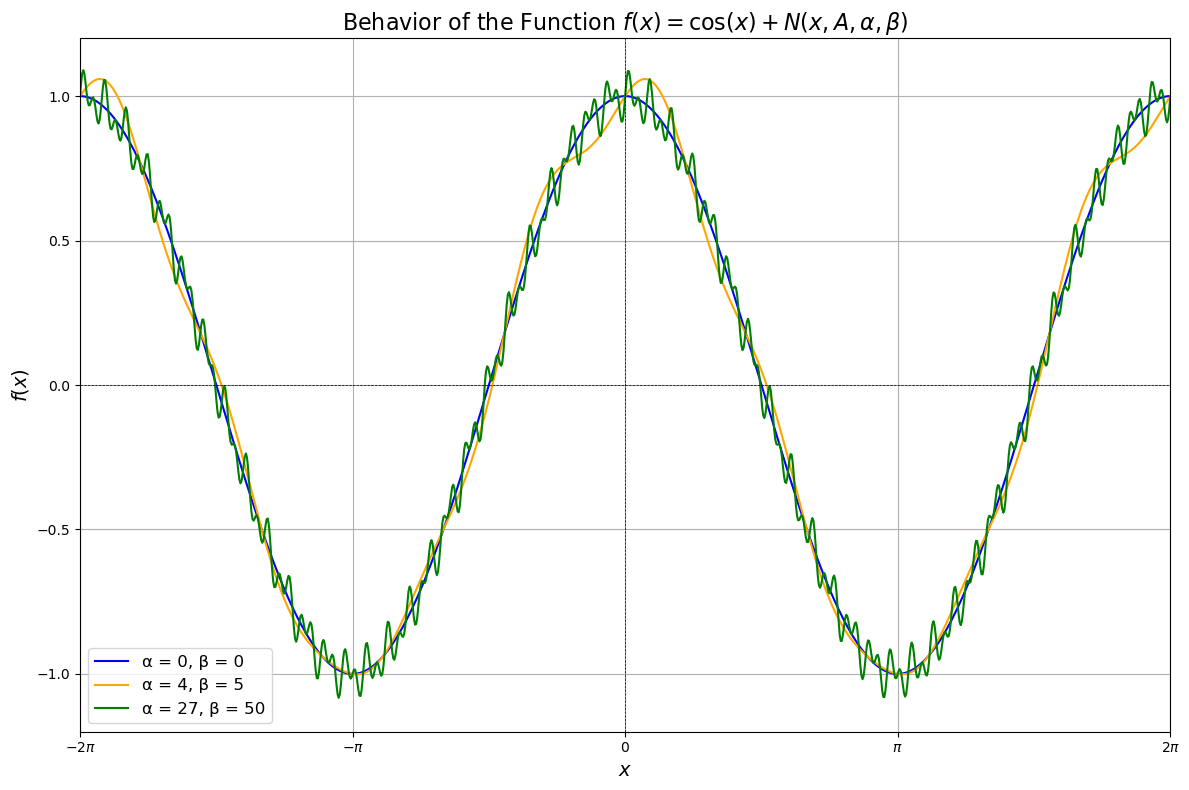

In [422]:

A = 0.05

def f(x, A, alpha, beta):
    return numpy.cos(x) + A * (numpy.sin(alpha * x) + numpy.sin(beta * x))
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, 1000)

y1 = f(x, A, 0, 0)         
y2 = f(x, A, 4, 5)        
y3 = f(x, A, 27, 50)      
plt.figure(figsize=(12, 8))
plt.plot(x, y1, label='α = 0, β = 0', color='blue')
plt.plot(x, y2, label='α = 4, β = 5', color='orange')
plt.plot(x, y3, label='α = 27, β = 50', color='green')
plt.title('Behavior of the Function $f(x) = \cos(x) + N(x, A, \\alpha, \\beta)$', fontsize=16)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend(fontsize=12)
plt.xlim(-2 * numpy.pi, 2 * numpy.pi)
plt.ylim(-1.2, 1.2)
plt.xticks([-2 * numpy.pi, -numpy.pi, 0, numpy.pi, 2 * numpy.pi], 
           [r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$'])
plt.tight_layout()

plt.show()


**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* brentq method using scipy.optimize.root_scalar
* **EXTRA CREDIT** any other method used in root_scalar

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.2$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

In [424]:
from scipy.optimize import root_scalar

A = 0.05
params = [(0., 0.), (4., 5.), (27., 50.)]
x0, x1 = 0.2, 2.0  

def f(x, A, alpha, beta):
    return numpy.cos(x) + A * (numpy.sin(alpha * x) + numpy.sin(beta * x))

results = {}

for alpha, beta in params:
    func = lambda x: f(x, A, alpha, beta)
    
    # Bisection method
    bisect_result = root_scalar(func, method='bisect', bracket=[x0, x1])
    results[f'Bisection (α={alpha}, β={beta})'] = {
        'root': bisect_result.root,
        'f(root)': func(bisect_result.root),
        'iterations': bisect_result.iterations
    }

    # Newton's method 
    if alpha == 27:
        initial_guess = 0.2  
    else:
        initial_guess = 1.0  

    newton_root, newton_iterates = newton(func, f_prime, x0=initial_guess)
    results[f'Custom Newton (α={alpha}, β={beta})'] = {
        'root': newton_root,
        'f(root)': func(newton_root),
        'iterations': len(newton_iterates) - 1
    }

    # Secant method
    secant_result = root_scalar(func, method='secant', x0=0.2, x1=2.0)  
    results[f'Secant (α={alpha}, β={beta})'] = {
        'root': secant_result.root,
        'f(root)': func(secant_result.root),
        'iterations': secant_result.iterations
    }

    # Brent's method
    brent_result = root_scalar(func, method='brentq', bracket=[x0, x1])
    results[f'Brent (α={alpha}, β={beta})'] = {
        'root': brent_result.root,
        'f(root)': func(brent_result.root),
        'iterations': brent_result.iterations
    }
    
    # Ridder's method (extra credit)
    ridder_result = root_scalar(func, method='ridder', bracket=[x0, x1])
    results[f'Ridder (α={alpha}, β={beta})'] = {
        'root': ridder_result.root,
        'f(root)': func(ridder_result.root),
        'iterations': ridder_result.iterations
    }

print(f"{'Method':<20} {'α':<10} {'β':<10} {'Root':<20} {'f(Root)':<20} {'Iterations':<20}")
print("="*90)

for method, info in results.items():
    method_name, params = method.split(" (")
    alpha, beta = params[:-1].split(", ")
    print(f"{method_name:<20} {alpha:<10} {beta:<10} {info['root']:<20.6f} {info['f(root)']:<20.16f} {info['iterations']:<20}")

Method               α          β          Root                 f(Root)              Iterations          
Bisection            α=0.0      β=0.0      1.570796             -0.0000000000001654  40                  
Custom Newton        α=0.0      β=0.0      1.570796             0.0000005245481816   20                  
Secant               α=0.0      β=0.0      1.570796             -0.0000000000000002  6                   
Brent                α=0.0      β=0.0      1.570796             0.0000000000000001   7                   
Ridder               α=0.0      β=0.0      1.570796             0.0000000000003609   6                   
Bisection            α=4.0      β=5.0      1.630441             -0.0000000000004852  40                  
Custom Newton        α=4.0      β=5.0      1.630440             0.0000008960764161   24                  
Secant               α=4.0      β=5.0      1.630441             0.0000000000000365   6                   
Brent                α=4.0      β=5.0      1.6

**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.2$.

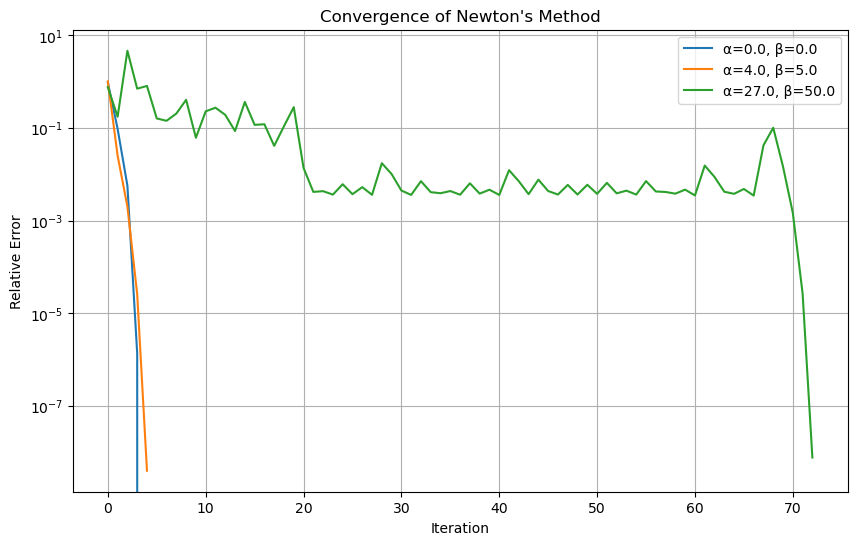

In [426]:

A = 0.05
params = [(0., 0.), (4., 5.), (27., 50.)]
x0 = 0.2  

def f(x, A, alpha, beta):
    return numpy.cos(x) + A * (numpy.sin(alpha * x) + numpy.sin(beta * x))
def newton_with_convergence(func, x0, A, alpha, beta, max_iter=100, tol=1e-6):
    errors = []
    x_current = x0
    
    for iteration in range(max_iter):
        f_current = func(x_current)
        f_prime = -numpy.sin(x_current) + A * (alpha * numpy.cos(alpha * x_current) + beta * numpy.cos(beta * x_current))
        
        x_next = x_current - f_current / f_prime
        relative_error = abs((x_next - x_current) / x_next) if x_next != 0 else 0
        errors.append(relative_error)
        
        if relative_error < tol:
            break
            
        x_current = x_next
    
    return x_next, errors

plt.figure(figsize=(10, 6))

for alpha, beta in params:
    func = lambda x: f(x, A, alpha, beta)
    root, errors = newton_with_convergence(func, x0, A, alpha, beta)
    plt.plot(errors, label=f'α={alpha}, β={beta}')

plt.yscale('log')  
plt.xlabel('Iteration')
plt.ylabel('Relative Error')
plt.title("Convergence of Newton's Method")
plt.legend()
plt.grid()
plt.show()

**(d)** [4] Briefly explain your results so far for all the methods.  Feel free to play with other initial parameters or to make additional plots.  

### Results Overview

In this exploration, we analyzed several rootfinding methods for the function 

$$
f(x) = \cos(x) + N(x, A, \alpha, \beta) = \cos(x) + A[\sin(\alpha x) + \sin(\beta x)
]
$$

with different parametealpha and beta\
beta)\).

- **Bisection Method**: A reliable but slower method that narrows down the search interval to find roots.
- **Newton's Method**: An efficient method that converges quickly, but is sensitive to the initial guess.
- **Secant Method**: Similar to Newton's but doesn't require derivatives, providing a good alternative.
- **Brent's Method**: A robust and fast method that combines Bisection and Secant, ensuring reliable convergence.
- **Ridder's Method**: A competitive method useful for functions that are difficult to differentiate, blending features of Bisectionplex functions.
ir applicability in numerical analysis.


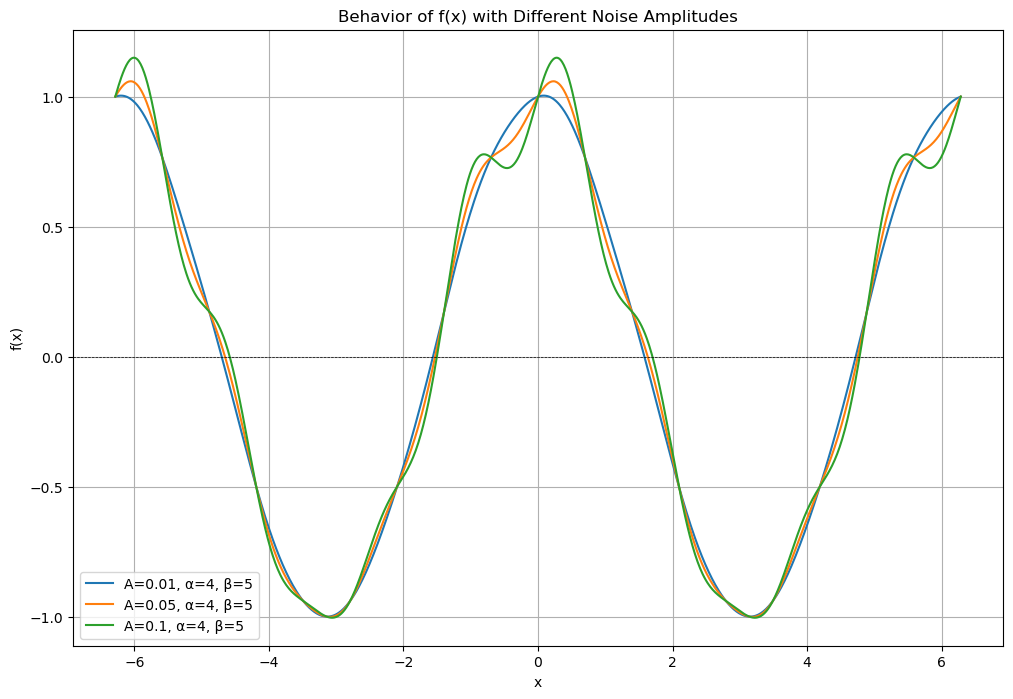

In [429]:
import numpy as np

def N(x, A, alpha, beta):
    return A * (np.sin(alpha * x) + np.sin(beta * x))

def f(x, A, alpha, beta):
    return np.cos(x) + N(x, A, alpha, beta)

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
params = [(0.01, 4, 5), (0.05, 4, 5), (0.1, 4, 5)]

plt.figure(figsize=(12, 8))

for A, alpha, beta in params:
    plt.plot(x, f(x, A, alpha, beta), label=f'A={A}, α={alpha}, β={beta}')

plt.title('Behavior of f(x) with Different Noise Amplitudes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()


**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

`x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)`

In [431]:
def newtsafe(f,f_prime,a,b,tol = 1.e-6, max_steps=1000):
    """ Please improve this docstring
        
    
    Parameters:
    -----------
    
    f: function (float)
        function returning f(x)
    f_prime:  function (float)
        function returning derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f(x)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """
# YOUR CODE HERE
    n_newt = 0
    n_bisection = 0
    x = (a+b)/2
    
    #Bracket Check
    if numpy.sign(f(a)) == numpy.sign(f(b)):
        raise ValueError("no bracket: f(a) and f(b) must have different signs")
        
    for step in range(1, max_steps + 1):
        if numpy.abs(f(x)) < tol:
            break  

        x1 = x - f(x) / f_prime(x)
        if x1<a or x1>b:
            n_bisection += 1
            if (numpy.sign(f(a)) != numpy.sign(f(x))):
                b = x
            else:
                a = x
            delta_x = b - a
            x1 = a + delta_x / 2.0
        else:
            n_newt += 1
        
        x = x1

        if step == max_steps:
            warnings.warn('Maximum number of steps exceeded')
        
    return x, n_newt, n_bisection

In [432]:
# Testing Cell
from  rootfinding_optimization_schemes import newton
from scipy.optimize import root_scalar

a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.cos(a * x) + b*numpy.cos(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    sol = root_scalar(f, bracket=(a, b),method='brentq')
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(sol.root, sol.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, sol.root,decimal=5)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


Bracket  = [-0.68309670780092, 2.642524050776319]
Newton   = 1.27194847295657,    N   = 3
NewtSafe = 1.27194847295657,    N_n = 3, N_b = 0
brentq   = 1.2719484732512498,    N   = 9

Bracket  = [-0.7104536143852529, 3.8152626763086603]
Newton   = -23.8662065317763,    N   = 7
NewtSafe = 1.0884990113244402,    N_n = 3, N_b = 2
brentq   = 1.088499013515958,    N   = 13

Bracket  = [-0.5236057894835726, 3.9067882124238986]
Newton   = -10.863477689404652,    N   = 11
NewtSafe = 1.1106142646362411,    N_n = 5, N_b = 1
brentq   = 1.1106142646873127,    N   = 11

Bracket  = [-0.5275356434135271, 2.4988039593212776]
Newton   = 1.3248590962279085,    N   = 3
NewtSafe = 1.3248590962279085,    N_n = 3, N_b = 0
brentq   = 1.3248590968150393,    N   = 9

Bracket  = [-0.3534683303763972, 3.9130408021252014]
Newton   = 1.1473182519095415,    N   = 10
NewtSafe = 1.1473181573836526,    N_n = 6, N_b = 1
brentq   = 1.1473182519138232,    N   = 10

no bracket: f(a) and f(b) must have different signs
succes

## Question 3 - Solve a "real" rootfinding problem

In Homework 2, I asked you to *estimate* the number of terms in the taylor expansion of $e^x$ such that the relative error was less than $\epsilon_{mach}$.  This was essentially a non-linear problem in the number of steps $n$.  Here we will use a rootfinder to get this number more precisely.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 0.1, 1., 10. ,100. , 709., 1000. and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


# Summary of Taylor Series Terms Required for \( e^x \)

The following table shows the number of terms required in the Taylor series expansion for \( e^x \) at various values of \( x \):

| Value of \( x \) | Number of Terms |
|-------------------|-----------------|
| 0.1               | 51              |
| 1                 | 53              |
| 10                | 80              |
| 100               | 350             |
| 709               | 2177            |
| 1000              | 3050            |

## Interpretation of Results

- The number of terms increases significantly with larger values of \( x \).
- At \( x = 0.1 \) and \( x = 1 \), relatively few terms (around 50) are needed to achieve sufficient accuracy.
- As \( x \) increases to 10 and 100, the number of required terms rises substantially (80 and 350, respectively).
- For very large values like \( x = 709 \) and \( x = 1000 \), the number of terms required exceeds 2000, highlighting the rapid growth of the factorial in the Taylor series expansion.

This demonstrates the impact of \( x \) on the convergence and accuracy of the Taylor series for \( e^x \).


In [436]:
from math import factorial

def Tn_exp(x):

    assert(isinstance(x,float))
    
    use_inv = False
    if x<0:
        x = abs(x)
        use_inv = True
        
    MAX_N = int(numpy.ceil(3*x))+50
    
    p = []
    for n in range(MAX_N + 1):
        p.append(1 / factorial(n))    
    p.reverse()    
    
    Tn = p[0]
    for coefficient in p[1:]:
        Tn = Tn * x + coefficient
        
    if use_inv:
        Tn = 1/Tn

    return MAX_N

print("For x = 0.1,",Tn_exp(0.1),"terms.")
print("For x = 1,",Tn_exp(1.),"terms.")
print("For x = 10,",Tn_exp(10.),"terms.")
print("For x = 100,",Tn_exp(100.),"terms.")
print("For x = 709,",Tn_exp(709.),"terms.")
print("For x = 1000,",Tn_exp(1000.),"terms.")


For x = 0.1, 51 terms.
For x = 1, 53 terms.
For x = 10, 80 terms.
For x = 100, 350 terms.
For x = 709, 2177 terms.
For x = 1000, 3050 terms.


In [437]:
x_values = [0.1, 1.0, 10.0, 100.0, 709.0, 1000.0]

for x in x_values:
    x0 = 10  
    f = lambda n: np.log(x) + 1 - np.log(n + 1) 
    f_prime = lambda n: -1 / (n + 1)  
    print(f"For x = {x}, {newton(f, f_prime, x0)}")

For x = 0.1, (nan, array([ 10.        , -30.70528402,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,  

C:\Users\harsh\AppData\Local\Temp\ipykernel_2904\1248002068.py:5: RuntimeWarning: invalid value encountered in log
  f = lambda n: np.log(x) + 1 - np.log(n + 1)
C:\Users\harsh\Computational Maths\hw2\rootfinding_optimization_schemes.py:128: UserWarning: Maximum number of steps exceeded
  warnings.warn('Maximum number of steps exceeded')
